In [1]:
import numpy as np
import sympy as sp
import pandas as pd
from scipy import stats as st
from matplotlib import pyplot as plt
from scipy import optimize as opt
from statsmodels.stats.diagnostic import lilliefors
sp.init_printing(use_unicode=False, wrap_line=False, no_global=True)

file_path = 'data.xlsx'
data = pd.read_excel(file_path)
gpa = data.iloc[:, 0]  
gtk = data.iloc[:, 1]
gtk = gtk.dropna()

### Задание 1.8. Исследование согласия выборки с экспоненциальным распределением ####

#### *1. Вычислите выборочный коэффициент вариации. Методом моментов проверьте гипотезу о согласии с экспоненциальным распределением.* ####

In [2]:
# Расчёты для gpa
gpa_len = len(gpa)
gpa_mean = gpa.mean()
gpa_std = gpa.std()
gpa_var = gpa.var()

# Расчёты для gtk
gtk_len = len(gtk)
gtk_mean = gtk.mean()
gtk_std = gtk.std()
gtk_var = gtk.var()

data = {
    "Метрика": ["Длина", "Среднее выборочное", "Cтандартное отклонение", "Выборочная дисперсия"],
    "ГПА": [gpa_len, round(gpa_mean, 2), round(gpa_std, 2), round(gpa_var, 2)],
    "ГТК": [gtk_len, round(gtk_mean, 2), round(gtk_std, 2), round(gtk_var, 2)],
}

results_df = pd.DataFrame(data)

# Вывод результатов
print(results_df)

                  Метрика          ГПА          ГТК
0                   Длина        60.00        54.00
1      Среднее выборочное      4461.95      9043.87
2  Cтандартное отклонение      4097.46      5098.36
3    Выборочная дисперсия  16789184.59  25993300.83


Если $\xi$ имеет показательное распределение $E_\lambda$, то справедливо следующее:
$$M\xi=\frac{1}{\lambda};\quad D\xi=\frac{1}{\lambda^2};\quad V=\frac{\sqrt{D\xi}}{M\xi}=1$$

In [3]:
gpa_V = gpa_std / gpa_mean
gtk_V = gtk_std / gtk_mean
gpa_V, gtk_V

Если гипотеза $H_0:V=1$ - верна, то статистика
$$Z=\left(\frac{\overline{x}}{S}-\frac{n^2}{(n-1)^2}\right)\sqrt{n}$$
имеет стандартное нормальное распределение при $n\to\infty, Z\in N(0,1)$

Если гипотеза ($Z\sim F(z)$) верна, то числовая реализация $\widehat{Z}$ должна быть в допустимой области с вероятностью $1-\alpha$, иначе если $\widehat{Z}$ оказывается в критической области, то мы считаем, что гипотеза неверна, хотя $\widehat{Z}$ могла там оказаться с вероятностью $\alpha$

Т.к. $F(z)$ (стандартное нормальное распределение) симметрично относительно нуля, то двустороннюю допустимую область для $\widehat{Z}$ можно свести к односторонней области для $|\widehat{Z}|$ и считать значимость (если значимость меньше уровня значимости $\alpha$, то гипотезу следует отвергнуть):
$$p=P\lbrace|Z|>|\widehat{Z}|\rbrace=2(1-F(|\widehat{Z}|))$$

In [4]:
Z_gpa = (gpa_mean / gpa_std - (gpa_len**2) / (gpa_len - 1)**2) * np.sqrt(gpa_len)
alpha = 0.01
p_gpa = 2 * (1 - st.norm.cdf(abs(Z_gpa)))
result_gpa = {
    'Метрика': ['Z', 'p-значение', 'Уровень значимости', 'Допустимая область', 'Решение по гипотезе'],
    'GPA': [
        Z_gpa,
        p_gpa,
        alpha,
        np.array(st.norm.interval(1-alpha)).astype(float),
        'Гипотезу не следует отвергать' if p_gpa >= alpha else 'Гипотезу следует отвергнуть'
    ]
}

In [5]:
Z_gtk = (gtk_mean / gtk_std - (gtk_len**2) / (gtk_len - 1)**2) * np.sqrt(gtk_len)
p_gtk = 2 * (1 - st.norm.cdf(abs(Z_gtk)))
result_gtk = {
    'Метрика': ['Z', 'p-значение', 'Уровень значимости', 'Допустимая область', 'Решение по гипотезе'],
    'GTK': [
        Z_gtk,
        p_gtk,
        alpha,
        np.array(st.norm.interval(1-alpha)).astype(float),
        'Гипотезу не следует отвергать' if p_gtk >= alpha else 'Гипотезу следует отвергнуть'
    ]
}

In [6]:
df_gpa = pd.DataFrame(result_gpa)
df_gtk = pd.DataFrame(result_gtk)
final_df = pd.concat([df_gpa.set_index('Метрика'), df_gtk.set_index('Метрика')], axis=1)
final_df

,GPA,GTK
Метрика,,
Z,0.424241,5.406898
p-значение,0.67139,0.0
Уровень значимости,0.01,0.01
Допустимая область,"[-2.5758293035489004, 2.5758293035489004]","[-2.5758293035489004, 2.5758293035489004]"
Решение по гипотезе,Гипотезу не следует отвергать,Гипотезу следует отвергнуть


#### *2. Постройте гистограмму и предложите закон распределения, которому эта выборка соответствует. Оцените параметры этого распределения и наложите график плотности на гистограмму.* ####

*Указание 1*. Рассмотрите следующие распределения: равномерное, нормальное, логнормальное, экспоненциальное, Гнеденко-Вейбулла, гамма-распределение.

*Указание 2*. Параметры гамма-распределения оцените методом моментов, параметры распределения Гнеденко-Вейбулла оцените методом наименьших квадратов.

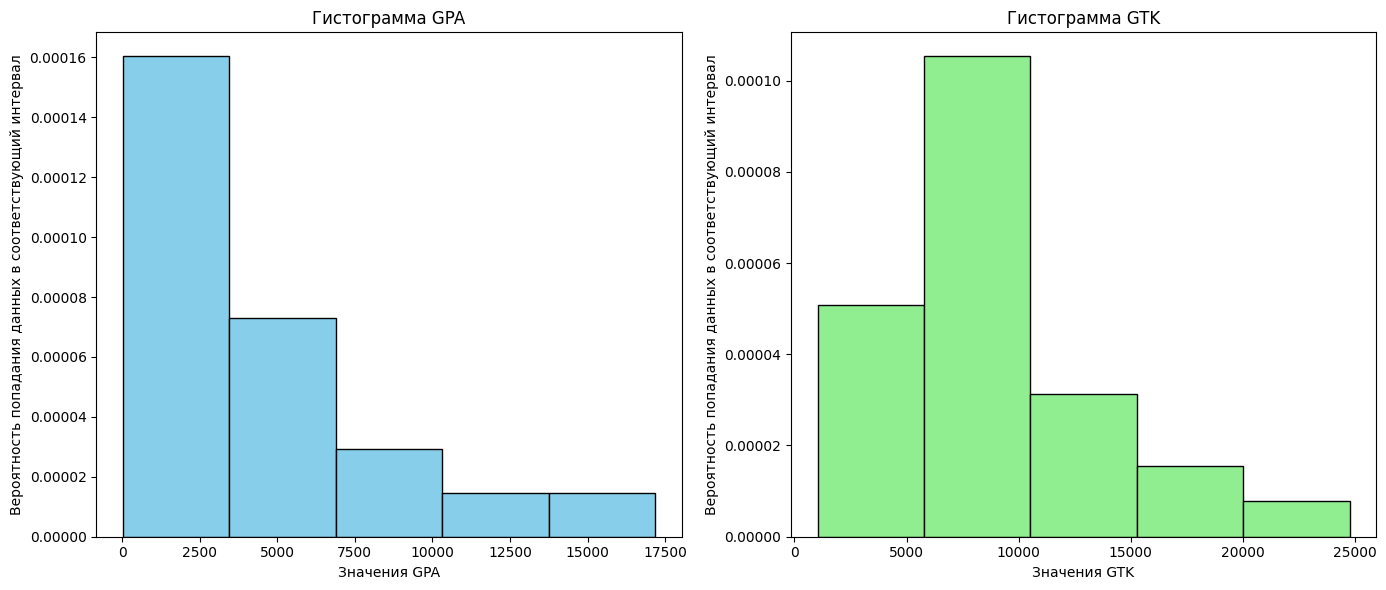

In [7]:
# Создание фигуры и осей для графиков
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Построение гистограммы для GPA
ax[0].hist(gpa, bins=5, density = True, color='skyblue', edgecolor='black')
ax[0].set_title('Гистограмма GPA')
ax[0].set_xlabel('Значения GPA')
ax[0].set_ylabel('Вероятность попадания данных в соответствующий интервал')

# Построение гистограммы для GTK
ax[1].hist(gtk, bins=5,  density = True, color='lightgreen', edgecolor='black')
ax[1].set_title('Гистограмма GTK')
ax[1].set_xlabel('Значения GTK')
ax[1].set_ylabel('Вероятность попадания данных в соответствующий интервал')

# Показать графики
plt.tight_layout()
plt.show()

In [8]:
# Определение распределений и их метки
dists_1 = [st.uniform, st.norm, st.lognorm, st.expon, st.weibull_min, st.gamma]
dists_2 = [st.uniform, st.norm, st.lognorm, st.expon, st.weibull_min, st.gamma]
labels = [
    'Равномерное',
    'Нормальное',
    'Логнормальное',
    'Экспоненциальное',
    'Гнеденко-Вейбулла',
    'Гамма'
]

# Получение параметров для каждого распределения
def get_dist_params_2(data):
    return [
        [data.min(), data.max()],
        dists_1[1].fit(data, method='MLE'),
        dists_1[2].fit(data, method='MLE'),
        dists_1[3].fit(data, method='MLE'),
        dists_1[4].fit(data, method='MM'),
        dists_1[5].fit(data, method='MM')
    ]
    
def get_dist_params_1(data):
    return [
        [data.min(), data.max()],
        dists_2[1].fit(data, method='MLE'),
        dists_2[2].fit(data, method='MLE'),
        dists_2[3].fit(data, method='MLE'),
        dists_2[4].fit(data, method='MM'),
        dists_2[5].fit(data, method='MM')
    ]

# Создание распределений на основе параметров
def get_fit_dists(data):
    return [dist(*params) for dist, params in zip(dists_1, get_dist_params_1(data))]

def     _2(data):
    return [dist(*params) for dist, params in zip(dists_1, get_dist_params_2(data))]


# Построение гистограммы и наложение плотностей
def plot_dists(data, bins=10):
    t = np.linspace(data.min(), data.max(), 1000)
    fig, axs = plt.subplots(2, 3, figsize=(20, 12))
    dists_fitted = get_fit_dists(data)

    for ax, dist, label in zip(axs.flatten(), dists_fitted, labels):
        # Построение гистограммы
        ax.hist(data, bins=bins, density=True, alpha=0.6, label='Выборка', edgecolor='black')
        # Наложение плотности распределения
        ax.plot(t, dist.pdf(t), linewidth=3, label='Плотность')
        ax.legend()
        ax.set_title(label)
        ax.grid()

    fig.tight_layout()
    plt.show()

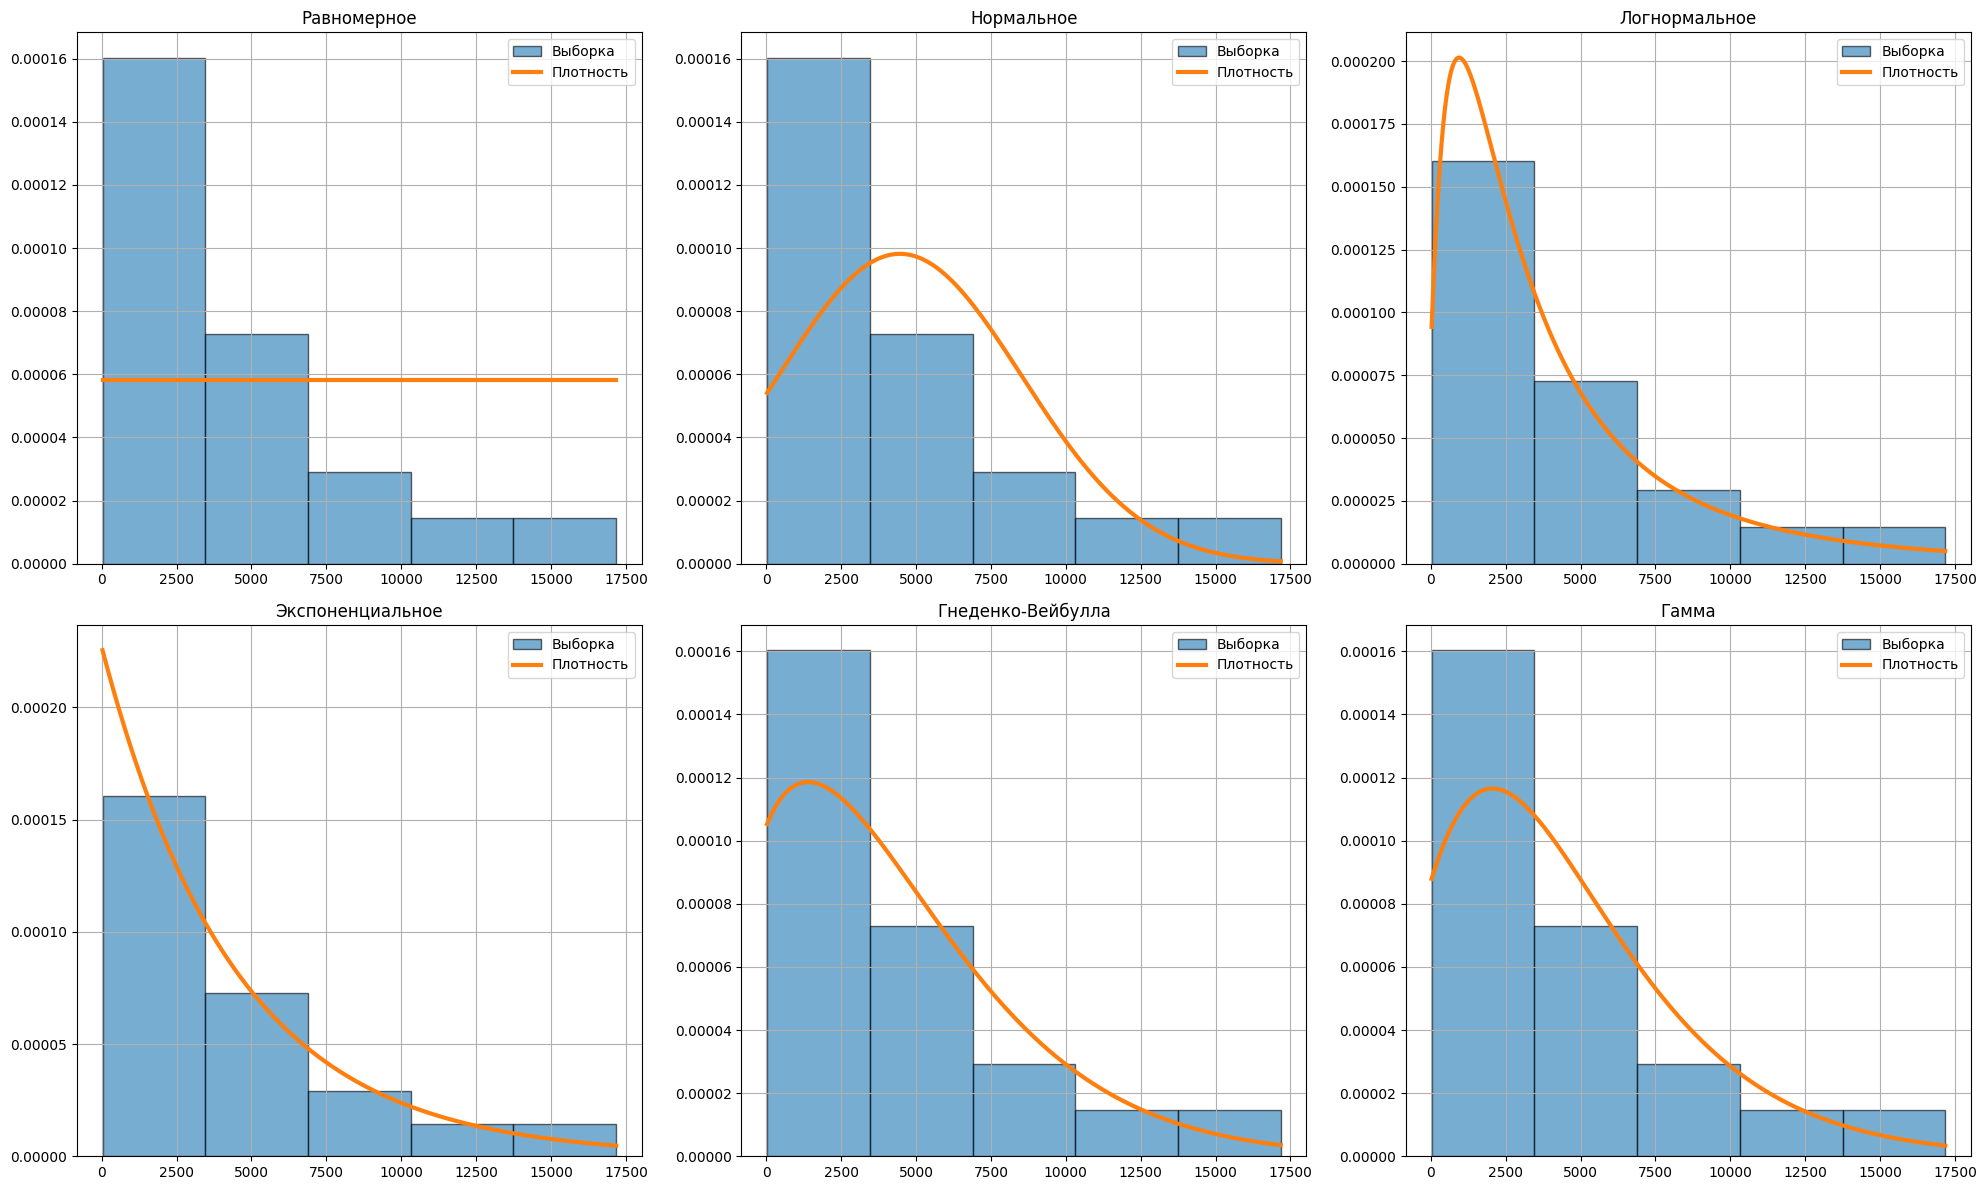

In [9]:
plot_dists(gpa, bins=5)

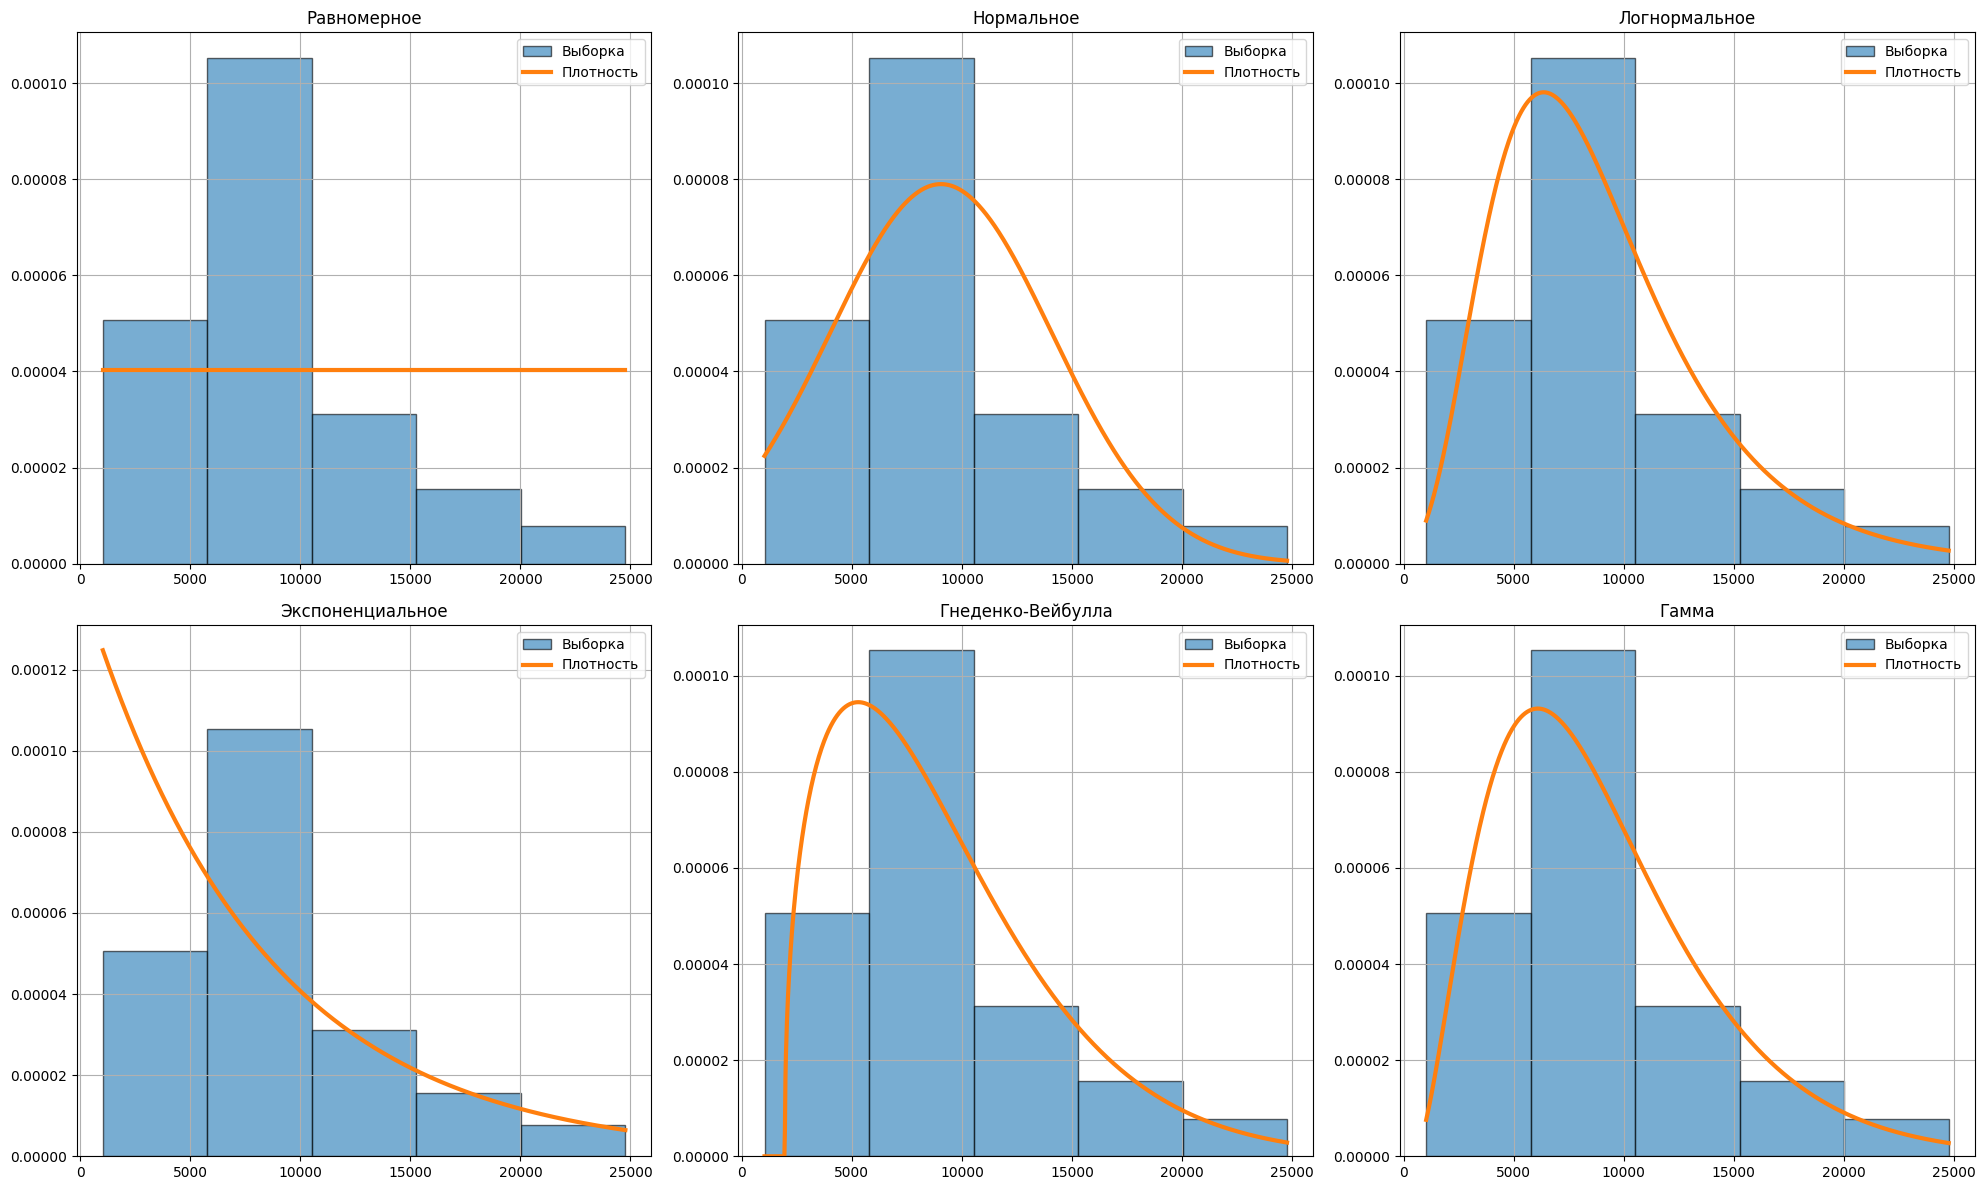

In [10]:
plot_dists(gtk, bins=5)

#### *3. Проверьте гипотезу о согласии с этим распределением по $\chi^2$-критерию.* ####

In [11]:
def check_chisquare(data, dist, alpha=0.01, label='', interval_alpha=0.01, intervals=10):
    r = len(dist.args)
    L, R = dist.ppf(interval_alpha/2), dist.ppf(1-interval_alpha/2)
    bins = np.linspace(L, R, intervals+1)
    data_freq, _ = np.histogram(data, bins=bins)
    N = sum(data_freq)
    dist_freq = np.array([dist.cdf(bins[i+1]) - dist.cdf(bins[i]) for i in range(intervals)])
    Zi2 = lambda i:(data_freq[i] - N * dist_freq[i])**2 / (N * dist_freq[i] * (1 - dist_freq[i]))
    Z = sum(Zi2(i) for i in range(len(data_freq)))
    target_chi2 = st.chi2(intervals-r-1)
    p = 1 - target_chi2.cdf(Z)
    Lz, Rz = map(float, target_chi2.interval(1-alpha))
    
    # Собираем результаты
    return {
        'Распределение': label,
        'Статистика хи-квадрат': round(Z, 4),
        'p-значение': round(p, 4),
        'Уровень значимости': alpha,
        'Область допустимости': f'[{round(Lz, 4)}, {round(Rz, 4)}]',
        'Вывод': 'Гипотезу не следует отвергать' if alpha < p and Lz <= Z <= Rz else 'Гипотезу следует отвергать'
    }
    

In [12]:
dists = get_fit_dists(gpa)
results = []
for i in range(len(dists)):
    results.append(check_chisquare(gpa, dists[i], label=labels[i]))

In [13]:
df = pd.DataFrame(results)

# Выводим таблицу
pd.set_option('display.float_format', '{:.10f}'.format)  # Форматируем вывод чисел
# Установим максимальную ширину столбцов в выводе
pd.set_option('display.max_columns', None)  # Показывать все столбцы
pd.set_option('display.width', 1000)  # Установить ширину вывода (в символах)
print(df)

       Распределение  Статистика хи-квадрат   p-значение  Уровень значимости Область допустимости                          Вывод
0        Равномерное          65.7179000000 0.0000000000        0.0100000000    [0.9893, 20.2777]     Гипотезу следует отвергать
1         Нормальное          23.7161000000 0.0013000000        0.0100000000    [0.9893, 20.2777]     Гипотезу следует отвергать
2      Логнормальное           2.5469000000 0.8632000000        0.0100000000    [0.6757, 18.5476]  Гипотезу не следует отвергать
3   Экспоненциальное           4.5146000000 0.7190000000        0.0100000000    [0.9893, 20.2777]  Гипотезу не следует отвергать
4  Гнеденко-Вейбулла           4.3401000000 0.6308000000        0.0100000000    [0.6757, 18.5476]  Гипотезу не следует отвергать
5              Гамма           9.7222000000 0.1369000000        0.0100000000    [0.6757, 18.5476]  Гипотезу не следует отвергать


In [14]:
dists = get_fit_dists_2(gtk)
results = []
for i in range(len(dists)):
    results.append(check_chisquare(gtk, dists[i], label=labels[i]))

In [15]:
df = pd.DataFrame(results)

# Выводим таблицу
pd.set_option('display.float_format', '{:.10f}'.format)  # Форматируем вывод чисел
# Установим максимальную ширину столбцов в выводе
pd.set_option('display.max_columns', None)  # Показывать все столбцы
pd.set_option('display.width', 1000)  # Установить ширину вывода (в символах)
print(df)

       Распределение  Статистика хи-квадрат   p-значение  Уровень значимости Область допустимости                          Вывод
0        Равномерное          43.1784000000 0.0000000000        0.0100000000    [0.9893, 20.2777]     Гипотезу следует отвергать
1         Нормальное          11.2520000000 0.1280000000        0.0100000000    [0.9893, 20.2777]  Гипотезу не следует отвергать
2      Логнормальное           6.4376000000 0.3760000000        0.0100000000    [0.6757, 18.5476]  Гипотезу не следует отвергать
3   Экспоненциальное          33.1626000000 0.0000000000        0.0100000000    [0.9893, 20.2777]     Гипотезу следует отвергать
4  Гнеденко-Вейбулла           7.4262000000 0.2832000000        0.0100000000    [0.6757, 18.5476]  Гипотезу не следует отвергать
5              Гамма           7.2219000000 0.3008000000        0.0100000000    [0.6757, 18.5476]  Гипотезу не следует отвергать


#### *4. Постройте график эмпирической функции распределения на вероятностной бумаге.* ####

Вероятностной называется бумага для построения графика интегральной функции распределения, у которой масштаб по оси абсцисс равномерен, а по оси ординат — неравномерен (кроме равномерного распределения) и соответствует проверяемому закону распределения. График интегральной функции распределения превращается на соответствующей вероятностной бумаге в прямую линию.

In [16]:
# Функция для построения вероятностного графика (Q-Q plot)
def probabilityplot(data, dist, ax=plt):
    # Сортируем данные
    data_sorted = np.sort(data)
    
    # Получаем эмпирическую функцию распределения (ECDF)
    y0 = np.arange(1, len(data_sorted)+1) / len(data_sorted)
    
    # Для заданного распределения находим соответствующие квантильные значения
    y = dist.ppf(y0)
    
    # Строим график
    ax.plot(data_sorted, y, 'o')
    
    # Нарисуем линию y = x
    ax.plot([data_sorted[0], data_sorted[-1]], [data_sorted[0], data_sorted[-1]], 'r')
    
    # Устанавливаем подписи
    ax.set_xlabel('x')
    ax.set_ylabel('y, F(y)=Fn(x)')
    

# Функция для построения множества графиков для всех распределений
def probabilityplots(data):
    fig, axs = plt.subplots(2, 3, figsize=(20, 12))
    dists = get_fit_dists(data)
    for ax, dist, label in zip(axs.flatten(), dists, labels):
        probabilityplot(data, dist, ax)
        ax.set_title(f'{label} распределение')
    fig.tight_layout()
    plt.show()

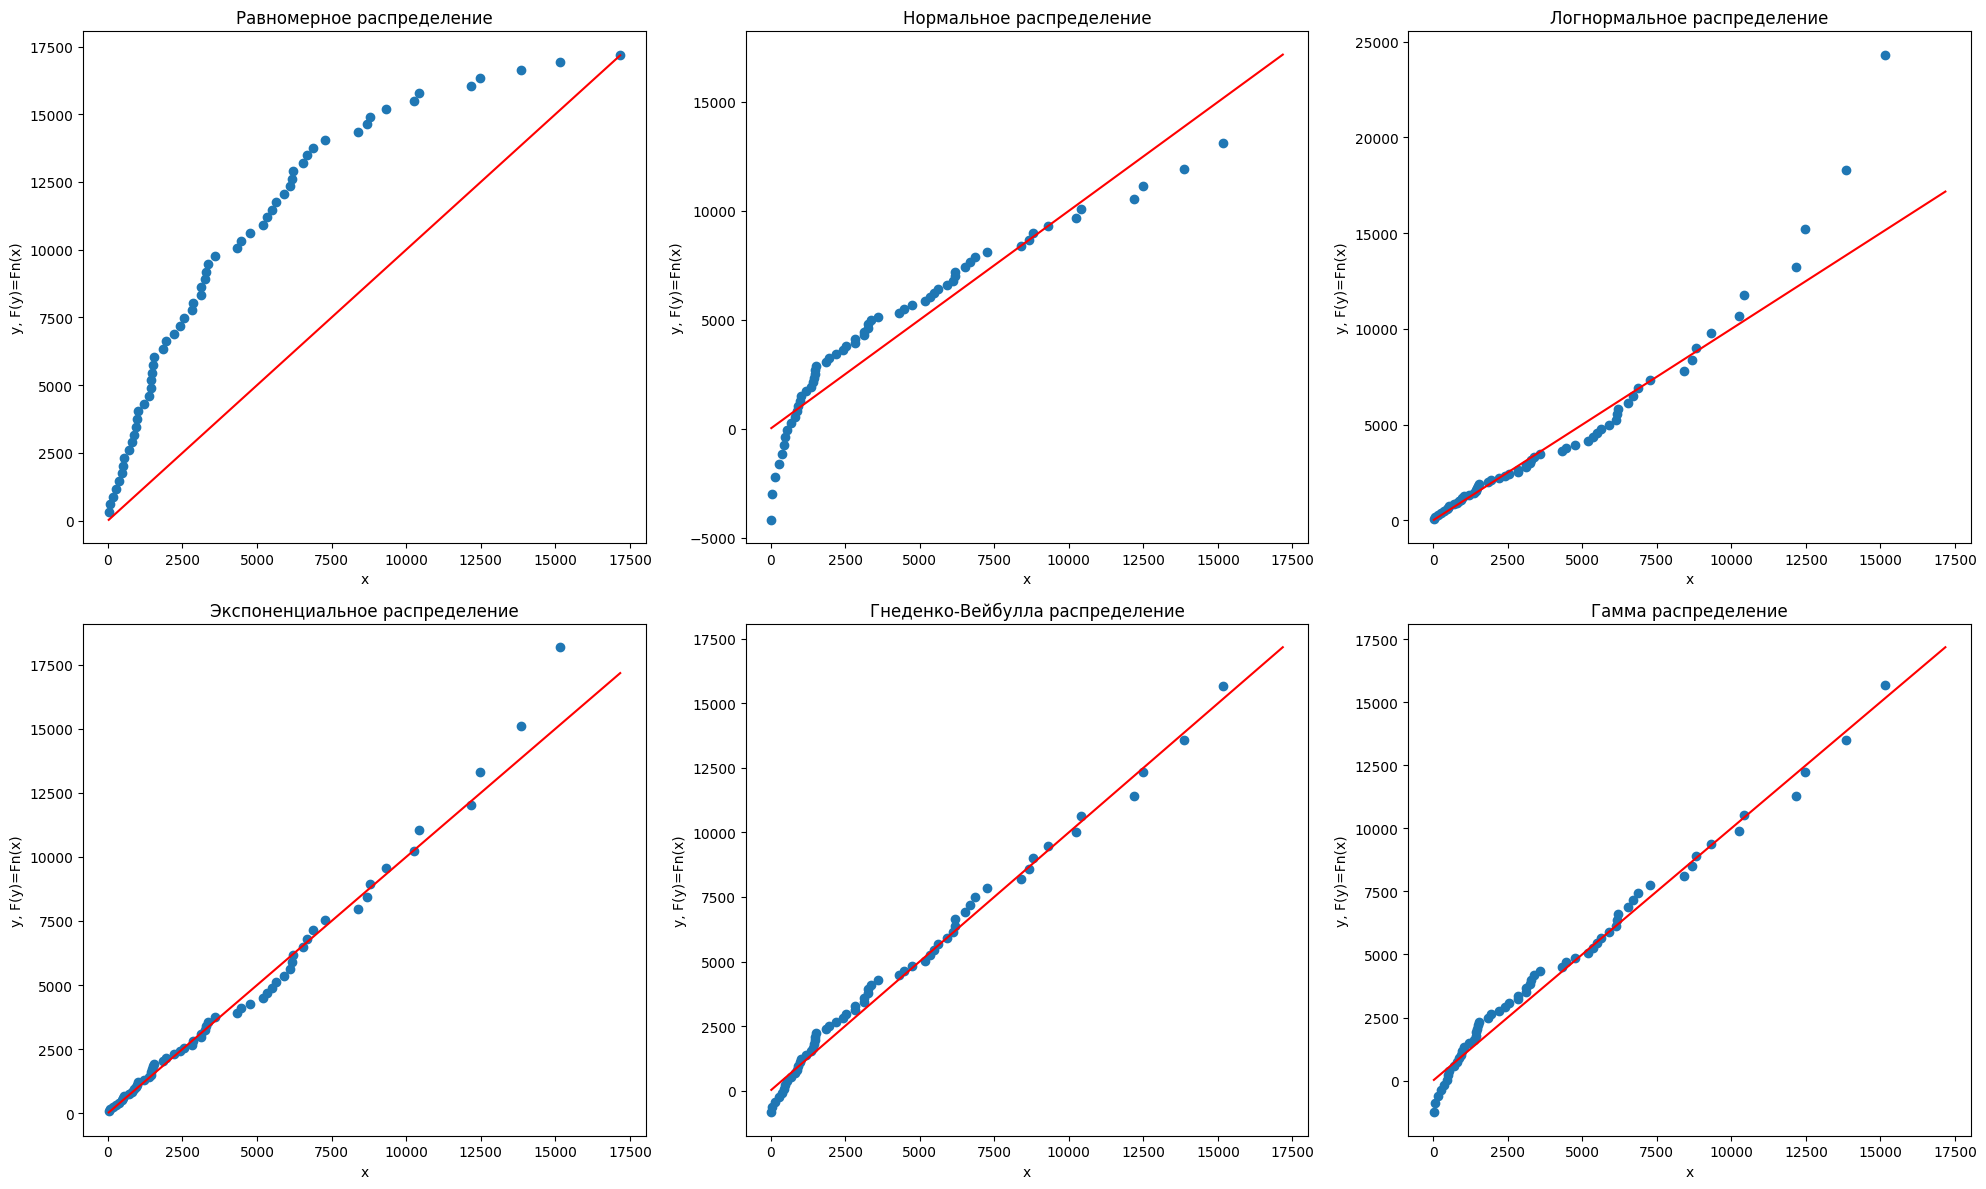

In [17]:
probabilityplots(gpa)

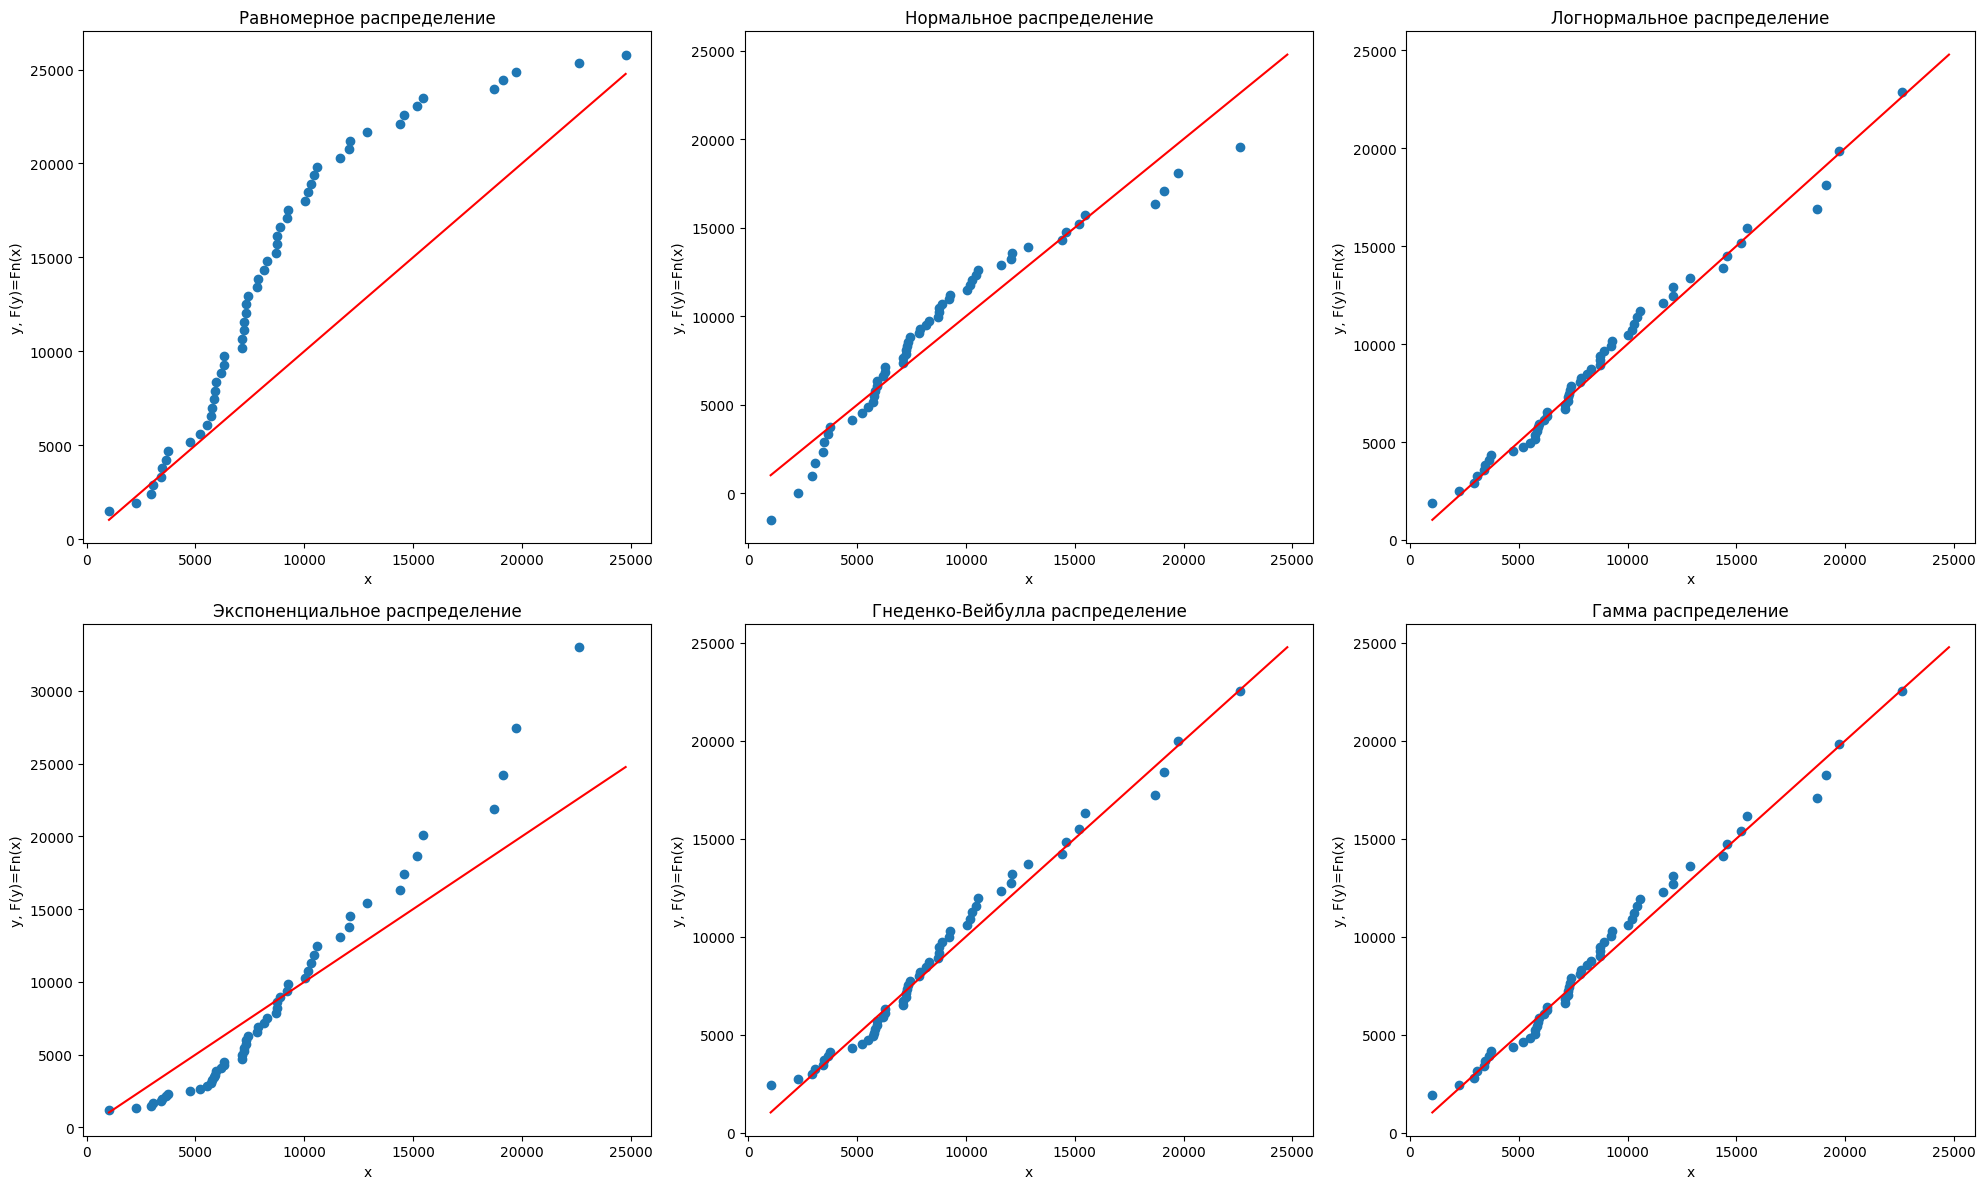

In [18]:
probabilityplots(gtk)

#### *5. Проверьте гипотезу о согласии с этим распределением по критерию типа Колмогорова (критерий Лиллифорса).* ####

In [19]:
def check_lilliefors(data, label, dist, alpha=0.01):
    # Выполняем тест Лиллифорса для выбранного распределения
    statistic, p = lilliefors(data, dist=dist)
    
    # Составляем словарь с результатами для каждой гипотезы
    return {
        'Распределение': label,
        'Статистика': statistic,
        'Значимость': p,
        'Уровень значимости': alpha,
        'Гипотеза': 'Следует отвергать' if p < alpha else 'Не следует отвергать'
    }

In [20]:
results = []
results.append(check_lilliefors(gpa, 'Нормальное', 'norm'))
results.append(check_lilliefors(gpa, 'Экспоненциальное', 'exp'))
results.append(check_lilliefors(np.log(gpa), 'Логнормальное', 'norm'))

df = pd.DataFrame(results)

# Выводим таблицу
pd.set_option('display.float_format', '{:.10f}'.format)  # Форматируем вывод чисел
# Установим максимальную ширину столбцов в выводе
pd.set_option('display.max_columns', None)  # Показывать все столбцы
pd.set_option('display.width', 1000)  # Установить ширину вывода (в символах)
print(df)

      Распределение   Статистика   Значимость  Уровень значимости              Гипотеза
0        Нормальное 0.1549767622 0.0019776930        0.0100000000     Следует отвергать
1  Экспоненциальное 0.0711188993 0.8200795188        0.0100000000  Не следует отвергать
2     Логнормальное 0.1049541931 0.1292001656        0.0100000000  Не следует отвергать


In [21]:
results = []
results.append(check_lilliefors(gtk, 'Нормальное', 'norm'))
results.append(check_lilliefors(gtk, 'Экспоненциальное', 'exp'))
results.append(check_lilliefors(np.log(gtk), 'Логнормальное', 'norm'))

df = pd.DataFrame(results)

# Выводим таблицу
pd.set_option('display.float_format', '{:.10f}'.format)  # Форматируем вывод чисел
# Установим максимальную ширину столбцов в выводе
pd.set_option('display.max_columns', None)  # Показывать все столбцы
pd.set_option('display.width', 1000)  # Установить ширину вывода (в символах)
print(df)

      Распределение   Статистика   Значимость  Уровень значимости              Гипотеза
0        Нормальное 0.1493688958 0.0050883963        0.0100000000     Следует отвергать
1  Экспоненциальное 0.2717185674 0.0010000000        0.0100000000     Следует отвергать
2     Логнормальное 0.1046258613 0.1701690152        0.0100000000  Не следует отвергать
